In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.neural_network import MLPClassifier



## DATA SET AUSTRALIAN

In [2]:
# Lire les fichiers
df_australian=pd.read_excel('australian.xls')
df_australian.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [3]:
print("taille ",df_australian.shape)

taille  (690, 15)


## **Divisons en échantillon d'apprentissage et échantillon de test**

In [4]:
# Identification de la variable à prédire
data_feature_au = df_australian[df_australian.columns[:-1]]
data_cible_au =df_australian["A15"]
print("données d'entrée\n" ,data_feature_au.head())
print("Variable à prédire\n" ,data_cible_au.head())

données d'entrée
    A1     A2     A3  A4  A5  A6     A7  A8  A9  A10  A11  A12  A13   A14
0   1  22.08  11.46   2   4   4  1.585   0   0    0    1    2  100  1213
1   0  22.67   7.00   2   8   4  0.165   0   0    0    0    2  160     1
2   0  29.58   1.75   1   4   4  1.250   0   0    0    1    2  280     1
3   0  21.67  11.50   1   5   3  0.000   1   1   11    1    2    0     1
4   1  20.17   8.17   2   6   4  1.960   1   1   14    0    2   60   159
Variable à prédire
 0    0
1    0
2    0
3    1
4    1
Name: A15, dtype: int64


##  **Pretraitement**

In [5]:
# Découpage en données d'entrainement et données de test
data_feature_train_au, data_feature_test_au, data_cible_train_au, data_cible_test_au = train_test_split(data_feature_au, data_cible_au, test_size=0.33, random_state=1)

In [6]:
print("Train size" ,data_feature_train_au.shape,data_cible_train_au.shape)
print("Test size" ,data_feature_test_au.shape,data_cible_test_au.shape)

Train size (462, 14) (462,)
Test size (228, 14) (228,)


In [7]:
# Traitement des données 
data_feature_train_au.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462 entries, 589 to 37
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      462 non-null    int64  
 1   A2      462 non-null    float64
 2   A3      462 non-null    float64
 3   A4      462 non-null    int64  
 4   A5      462 non-null    int64  
 5   A6      462 non-null    int64  
 6   A7      462 non-null    float64
 7   A8      462 non-null    int64  
 8   A9      462 non-null    int64  
 9   A10     462 non-null    int64  
 10  A11     462 non-null    int64  
 11  A12     462 non-null    int64  
 12  A13     462 non-null    int64  
 13  A14     462 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 54.1 KB


### **On n'a pas de données non nulles**

In [10]:
data_feature_train_au.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,0.675325,31.469264,4.667554,1.722944,7.402597,4.694805,2.120812,0.523810,0.415584,2.376623,0.454545,1.922078,181.722944,987.296537
std,0.468761,11.710792,4.948374,0.452845,3.621794,1.977074,2.949559,0.499974,0.493357,5.019802,0.498469,0.306101,178.661318,4199.457068
min,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,0.000000,22.670000,1.000000,1.000000,4.000000,4.000000,0.176250,0.000000,0.000000,0.000000,0.000000,2.000000,70.000000,1.000000
50%,1.000000,29.045000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,160.000000,4.000000
75%,1.000000,37.397500,7.000000,2.000000,10.000000,5.000000,2.688750,1.000000,1.000000,3.000000,1.000000,2.000000,271.000000,401.000000
max,1.000000,80.250000,26.335000,3.000000,14.000000,9.000000,17.500000,1.000000,1.000000,67.000000,1.000000,3.000000,2000.000000,51101.000000


In [11]:
# Normalisation des données
def standard(df, df1):
    l=[]
    scatter = StandardScaler()
    df_st=scatter.fit_transform(df)
    df_st=pd.DataFrame(df_st, columns=df.columns)
    l.append(df_st)
    df1_st=scatter.transform(df1)
    df1_st=pd.DataFrame(df1_st, columns=df1.columns)
    l.append(df1_st)
    return l

In [12]:
l=standard(data_feature_train_au, data_feature_test_au)
data_feature_train_au=l[0]
data_feature_test_au=l[1]

In [13]:
data_feature_train_au.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14
count,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,462.000000,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02
mean,-3.268189e-17,1.691768e-16,-3.844928e-17,-2.883696e-17,1.153478e-17,4.998407e-17,0.000000,7.689856e-18,-3.460435e-17,6.536378e-17,-9.996813e-17,8.458842e-17,1.115029e-16,1.537971e-17
std,1.001084e+00,1.001084e+00,1.001084e+00,1.001084e+00,1.001084e+00,1.001084e+00,1.001084,1.001084e+00,1.001084e+00,1.001084e+00,1.001084e+00,1.001084e+00,1.001084e+00,1.001084e+00
min,-1.442221e+00,-1.514712e+00,-9.442725e-01,-1.598178e+00,-1.769714e+00,-1.870850e+00,-0.719806,-1.048809e+00,-8.432740e-01,-4.739629e-01,-9.128709e-01,-3.015594e+00,-1.018239e+00,-2.351175e-01
25%,-1.442221e+00,-7.521953e-01,-7.419669e-01,-1.598178e+00,-9.404969e-01,-3.518119e-01,-0.659987,-1.048809e+00,-8.432740e-01,-4.739629e-01,-9.128709e-01,2.548389e-01,-6.260116e-01,-2.351175e-01
50%,6.933752e-01,-2.072355e-01,-3.879320e-01,6.124752e-01,1.651254e-01,-3.518119e-01,-0.380405,9.534626e-01,-8.432740e-01,-4.739629e-01,-9.128709e-01,2.548389e-01,-1.217191e-01,-2.344023e-01
75%,6.933752e-01,5.067687e-01,4.718669e-01,6.124752e-01,7.179366e-01,1.545342e-01,0.192759,9.534626e-01,1.185854e+00,1.243181e-01,1.095445e+00,2.548389e-01,5.002417e-01,-1.397638e-01
max,6.933752e-01,4.169967e+00,4.383446e+00,2.823128e+00,1.823559e+00,2.179919e+00,5.219715,9.534626e-01,1.185854e+00,1.288765e+01,1.095445e+00,3.525272e+00,1.018826e+01,1.194631e+01


### **Determinons les meilleurs parametres pour le model KNN en utilisant la fonction GridSearchCV()**

In [14]:
l=[i for i in range(0,101)]
param_grid_knn = {
    'n_neighbors': l,
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'metric': ['euclidean', 'manhattan']
}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_search_knn.fit(data_feature_train_au, data_cible_train_au)
best_params_knn = grid_search_knn.best_params_
best_params_knn

{'algorithm': 'auto',
 'metric': 'euclidean',
 'n_neighbors': 80,
 'weights': 'uniform'}

In [15]:
knn = KNeighborsClassifier(**best_params_knn)
knn.fit(data_feature_train_au, data_cible_train_au)

KNeighborsClassifier(metric='euclidean', n_neighbors=80)

In [60]:
prediction_knn = knn.predict(data_feature_test_au)
accuracy_knn = accuracy_score(data_cible_test_au, prediction_knn)
recall_knn = recall_score(data_cible_test_au, prediction_knn)
f1_knn = f1_score(data_cible_test_au, prediction_knn)

print("Accuracy :", accuracy_knn*100, '%')
print("Recall :", recall_knn*100, '%')
print("F1-score :", f1_knn*100, '%')


Accuracy : 85.96491228070175 %
Recall : 79.20792079207921 %
F1-score : 83.33333333333334 %


### **Determinons les meilleurs parametres pour le model Neive Bayes en utilisant la fonction RandomizedSearchCV()**

In [52]:
param_dist = {'var_smoothing': uniform(loc=1e-100, scale=1e-1)}
random_search = RandomizedSearchCV(GaussianNB(), param_dist, n_iter=10, cv=5)
random_search.fit(data_feature_train_au, data_cible_train_au)
best_params = random_search.best_params_
best_params

{'var_smoothing': 0.08249400922860935}

In [53]:
NB_model=GaussianNB(**best_params)
NB_model.fit(data_feature_train_au, data_cible_train_au)

GaussianNB(var_smoothing=0.08249400922860935)

In [62]:
prediction_nb = NB_model.predict(data_feature_test_au)
accuracy_nb = accuracy_score(data_cible_test_au, prediction_nb)
recall_nb = recall_score(data_cible_test_au, prediction_nb)
f1_nb = f1_score(data_cible_test_au, prediction_nb)

print("Accuracy :", accuracy_nb*100, '%')
print("Recall :", recall_nb*100, '%')
print("F1-score :", f1_nb*100, '%')

Accuracy : 80.7017543859649 %
Recall : 69.3069306930693 %
F1-score : 76.08695652173914 %


In [76]:
param_grid = {
    'hidden_layer_sizes': [(150,), (100,)], 
    'activation': ['tanh', 'logistic'],     
    'solver': ['adam', 'sgd'],                      
    'alpha': [0.0001, 0.01 - 0.0001],                
}
mlp_grid_search = GridSearchCV(MLPClassifier(max_iter=1000), param_grid, cv=5, n_jobs=-1)
mlp_grid_search.fit(data_feature_train_au, data_cible_train_au)
best_params_grid = mlp_grid_search.best_params_
best_score_grid = mlp_grid_search.best_score_

print("Meilleurs paramètres trouvés avec GridSearchCV :", best_params_grid)
print("Meilleur score trouvé avec GridSearchCV :", best_score_grid)

Meilleurs paramètres trouvés avec GridSearchCV : {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (150,), 'solver': 'sgd'}
Meilleur score trouvé avec GridSearchCV : 0.8701262272089763


In [79]:
mlp_model = MLPClassifier(**best_params_grid)
mlp_model.fit(data_feature_train_au, data_cible_train_au)

MLPClassifier(activation='tanh', hidden_layer_sizes=(150,), solver='sgd')

In [80]:
y_pred_mlp = mlp_model.predict(data_feature_test_au)
accuracy_mlp = accuracy_score(data_cible_test_au, y_pred_mlp)
recall_mlp = recall_score(data_cible_test_au, y_pred_mlp)
f1_mlp = f1_score(data_cible_test_au, y_pred_mlp)

print("Accuracy:", accuracy_mlp*100, '%')
print("Recall :", recall_mlp*100, '%')
print("F1-score :", f1_mlp*100, '%')

Accuracy: 87.71929824561403 %
Recall : 89.10891089108911 %
F1-score : 86.53846153846155 %


## DATA SET BREAST-CANCER-WISCONSIN

In [102]:
df_cancer=pd.read_excel("breast-cancer-wisconsin.xls")
df_cancer.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [101]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              699 non-null    int64 
 1   Uniformity of Cell Size      699 non-null    int64 
 2   Uniformity of Cell Shape     699 non-null    int64 
 3   Marginal Adhesion            699 non-null    int64 
 4   Single Epithelial Cell Size  699 non-null    int64 
 5   Bare Nuclei                  699 non-null    object
 6   Bland Chromatin              699 non-null    int64 
 7   Normal Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [104]:
# Trouvons les valeurs de type non int de la colonne Bare Nuclei.
l =[]
for i in range(0,len(df_cancer)):
    if type(df_cancer["Bare Nuclei"][i])!= int:
        l.append((df_cancer["Bare Nuclei"][i],i))
l

[('?', 23),
 ('?', 40),
 ('?', 139),
 ('?', 145),
 ('?', 158),
 ('?', 164),
 ('?', 235),
 ('?', 249),
 ('?', 275),
 ('?', 292),
 ('?', 294),
 ('?', 297),
 ('?', 315),
 ('?', 321),
 ('?', 411),
 ('?', 617)]

### **Remplaçons ces valeurs par la valeur la plus fréquente**

In [105]:
df_cancer["Bare Nuclei"].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [106]:
# Recuperons les indices des valeurs à changer
indices = []
for i in l:
    indices.append(i[1])

# Remplaçons les ? par 1
for i in range(0,len(df_cancer)):
    if i in indices:
        df_cancer["Bare Nuclei"][i]=1


In [107]:
# Verification 
df_cancer["Bare Nuclei"].value_counts()

1     418
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

#### **Le nombre de 1 a augmenté donc la transformation a reussi**

In [108]:
df_cancer.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [109]:
# Identification de la variable à prédire
data_feature_ca = df_cancer[df_cancer.columns[:-1]]
data_cible_ca =df_cancer["Class"]
print("données d'entrée :\n\n" ,data_feature_ca.head())

données d'entrée :

    Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
0                5                        1                         1   
1                5                        4                         4   
2                3                        1                         1   
3                6                        8                         8   
4                4                        1                         1   

   Marginal Adhesion  Single Epithelial Cell Size Bare Nuclei  \
0                  1                            2           1   
1                  5                            7          10   
2                  1                            2           2   
3                  1                            3           4   
4                  3                            2           1   

   Bland Chromatin  Normal Nucleoli  Mitoses  
0                3                1        1  
1                3                2        1  
2       

In [110]:
data_cible_ca

0      2
1      2
2      2
3      2
4      2
      ..
694    2
695    2
696    4
697    4
698    4
Name: Class, Length: 699, dtype: int64

In [111]:
# Transformation des valeurs 2 en 0 et des valeurs 4 en 1 de la variable cible
y_binary = [0 if label == 2 else 1 for label in data_cible_ca]
for i in range(len(data_cible_ca)):
    data_cible_ca[i]=y_binary[i]
data_cible_ca

0      0
1      0
2      0
3      0
4      0
      ..
694    0
695    0
696    1
697    1
698    1
Name: Class, Length: 699, dtype: int64

### Division des données 

In [112]:
# Division en données d'entrainement et données de test
data_feature_train_ca, data_feature_test_ca, data_cible_train_ca, data_cible_test_ca = train_test_split(data_feature_ca, data_cible_ca, test_size=0.33, random_state=1)
print("Train size" ,data_feature_train_ca.shape,data_cible_train_ca.shape)
print("Test size" ,data_feature_test_ca.shape,data_cible_test_ca.shape)

Train size (468, 9) (468,)
Test size (231, 9) (231,)


In [162]:
data_feature_train_ca.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses
count,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000
mean,4.514957,3.166667,3.228632,2.848291,3.232906,3.491453,2.916667,1.489316
std,2.786821,3.062168,2.968260,2.814854,2.200649,2.400467,3.106858,1.505839
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


**Dans ce data set on n'a pas besoin de normaliser les valeurs**

In [113]:
knn_ca = KNeighborsClassifier()
knn_ca.fit(data_feature_train_ca, data_cible_train_ca)

KNeighborsClassifier()

In [115]:
prediction_knn_ca = knn_ca.predict(data_feature_test_ca)
accuracy_knn_ca = accuracy_score(data_cible_test_ca, prediction_knn_ca)
recall_knn_ca = recall_score(data_cible_test_ca, prediction_knn_ca)
f1_knn_ca = f1_score(data_cible_test_ca, prediction_knn_ca)

print("Accuracy :", accuracy_knn_ca*100, '%')
print("Recall :", recall_knn_ca*100, '%')
print("F1-score :", f1_knn_ca*100, '%')


Accuracy : 96.96969696969697 %
Recall : 93.5064935064935 %
F1-score : 95.36423841059603 %


In [116]:
NB_model_ca=GaussianNB()
NB_model_ca.fit(data_feature_train_ca, data_cible_train_ca)

GaussianNB()

In [117]:
prediction_nb_ca = NB_model_ca.predict(data_feature_test_ca)
accuracy_nb_ca = accuracy_score(data_cible_test_ca, prediction_nb_ca)
recall_nb_ca = recall_score(data_cible_test_ca, prediction_nb_ca)
f1_nb_ca = f1_score(data_cible_test_ca, prediction_nb_ca)

print("Accuracy :", accuracy_nb_ca*100, '%')
print("Recall :", recall_nb_ca*100, '%')
print("F1-score :", f1_nb_ca*100, '%')

Accuracy : 96.96969696969697 %
Recall : 98.7012987012987 %
F1-score : 95.59748427672956 %


In [118]:
mlp_model_ca = MLPClassifier()
mlp_model_ca.fit(data_feature_train_ca, data_cible_train_ca)

MLPClassifier()

In [119]:
y_pred_mlp_ca = mlp_model_ca.predict(data_feature_test_ca)
accuracy_mlp_ca = accuracy_score(data_cible_test_ca, y_pred_mlp_ca)
recall_mlp_ca = recall_score(data_cible_test_ca, y_pred_mlp_ca)
f1_mlp_ca = f1_score(data_cible_test_ca, y_pred_mlp_ca)

print("Accuracy:", accuracy_mlp_ca*100, '%')
print("Recall :", recall_mlp_ca*100, '%')
print("F1-score :", f1_mlp_ca*100, '%')

Accuracy: 96.1038961038961 %
Recall : 90.9090909090909 %
F1-score : 93.95973154362416 %


## DATA SET PIMA-INDIANS-DIABETES

In [2]:
df_in=pd.read_excel("pima-indians-diabetes.xls")
df_in.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age,Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Number of times pregnant      768 non-null    int64  
 1   Plasma glucose concentration  768 non-null    int64  
 2   Diastolic blood pressure      768 non-null    int64  
 3   Triceps skin fold thickness   768 non-null    int64  
 4   2-Hour serum insulin          768 non-null    int64  
 5   Body mass index               768 non-null    float64
 6   Diabetes pedigree function    768 non-null    float64
 7   Age                           768 non-null    int64  
 8   Class variable                768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df_in.describe()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age,Class variable
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### **On remarque que les colonnes 'Plasma glucose concentration','Diastolic blood pressure','Triceps skin fold thickness','2-Hour serum insulin','Body mass index' ont des 0 comme valeurs ce qui est impossible**

### **Remplaçons ces valeurs par la mediane des valeurs correspondant à la classe 0 si le nan correspond à cette classe sinon par la mediane de la classe 1 **

In [5]:
colonnes=['Plasma glucose concentration','Diastolic blood pressure ', 'Triceps skin fold thickness ','2-Hour serum insulin ', 'Body mass index ']

In [6]:
# On rempalce les zéros par NaN dans les colonnes de la liste colonnes
df_in[colonnes] = df_in[colonnes].replace(0, np.nan)

# Calculer les médianes en fonction des classes de la variable cible pour chaque colonne
medians = {}
for col in colonnes:
    medians[col] = df_in.groupby('Class variable ')[col].median()

# Remplacer les valeurs NaN par les médianes cibles correspondantes
for col in colonnes:
    df_in[col].fillna(df_in['Class variable '].map(medians[col]), inplace=True)


In [7]:
# Identification de la variable à prédire
data_feature_in = df_in[df_in.columns[:-1]]
data_cible_in =df_in["Class variable "]
print("données d'entrée :\n\n" ,data_feature_in.head())

données d'entrée :

    Number of times pregnant  Plasma glucose concentration  \
0                         6                         148.0   
1                         1                          85.0   
2                         8                         183.0   
3                         1                          89.0   
4                         0                         137.0   

   Diastolic blood pressure   Triceps skin fold thickness   \
0                       72.0                          35.0   
1                       66.0                          29.0   
2                       64.0                          32.0   
3                       66.0                          23.0   
4                       40.0                          35.0   

   2-Hour serum insulin   Body mass index   Diabetes pedigree function  Age   
0                  169.5              33.6                       0.627    50  
1                  102.5              26.6                       0.351    31  
2 

In [9]:
# Division en données d'entrainement et données de test
data_feature_train_in, data_feature_test_in, data_cible_train_in, data_cible_test_in = train_test_split(data_feature_in, data_cible_in, test_size=0.33, random_state=1)
print("Train size" ,data_feature_train_in.shape,data_cible_train_in.shape)
print("Test size" ,data_feature_test_in.shape,data_cible_test_in.shape)

Train size (514, 8) (514,)
Test size (254, 8) (254,)


## **Normalisation**

In [12]:
N=standard(data_feature_train_in, data_feature_test_in)
data_feature_train_in=N[0]
data_feature_test_in=N[1]

### **Recherche des paramètres adéquats avec la fonction GridSearchCV()**

In [13]:
l=[i for i in range(0,10)]
param_grid_knn_in = {
    'n_neighbors': l,
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'metric': ['euclidean', 'manhattan']
}
grid_search_knn_in = GridSearchCV(KNeighborsClassifier(), param_grid_knn_in, cv=5)
grid_search_knn_in.fit(data_feature_train_in, data_cible_train_in)
best_params_knn_in = grid_search_knn_in.best_params_
best_params_knn_in

{'algorithm': 'auto',
 'metric': 'manhattan',
 'n_neighbors': 7,
 'weights': 'uniform'}

In [168]:
knn_in = KNeighborsClassifier(**best_params_knn_in)
knn_in.fit(data_feature_train_in, data_cible_train_in)

KNeighborsClassifier(metric='manhattan', n_neighbors=7)

In [172]:
prediction_knn_in= knn_in.predict(data_feature_test_in)
accuracy_knn_in = accuracy_score(data_cible_test_in, prediction_knn_in)
recall_knn_in = recall_score(data_cible_test_in, prediction_knn_in)
f1_knn_in = f1_score(data_cible_test_in, prediction_knn_in)

print("Accuracy :", accuracy_knn_in*100, '%')
print("Recall :", recall_knn_in*100, '%')
print("F1-score :", f1_knn_in*100, '%')


Accuracy : 86.61417322834646 %
Recall : 78.26086956521739 %
F1-score : 80.89887640449437 %


In [185]:
NB_model_in=GaussianNB()
NB_model_in.fit(data_feature_train_in, data_cible_train_in)

GaussianNB()

In [186]:
prediction_nb_in = NB_model_in.predict(data_feature_test_in)
accuracy_nb_in = accuracy_score(data_cible_test_in, prediction_nb_in)
recall_nb_in = recall_score(data_cible_test_in, prediction_nb_in)
f1_nb_in = f1_score(data_cible_test_in, prediction_nb_in)

print("Accuracy :", accuracy_nb_in*100, '%')
print("Recall :", recall_nb_in*100, '%')
print("F1-score :", f1_nb_in*100, '%')

Accuracy : 79.13385826771653 %
Recall : 67.3913043478261 %
F1-score : 70.05649717514125 %


In [14]:
mlp_model_in = MLPClassifier()
mlp_model_in.fit(data_feature_train_in, data_cible_train_in)

MLPClassifier()

In [15]:
y_pred_mlp_in = mlp_model_in.predict(data_feature_test_in)
accuracy_mlp_in = accuracy_score(data_cible_test_in, y_pred_mlp_in)
recall_mlp_in = recall_score(data_cible_test_in, y_pred_mlp_in)
f1_mlp_in = f1_score(data_cible_test_in, y_pred_mlp_in)

print("Accuracy:", accuracy_mlp_in*100, '%')
print("Recall :", recall_mlp_in*100, '%')
print("F1-score :", f1_mlp_in*100, '%')

Accuracy: 86.61417322834646 %
Recall : 73.91304347826086 %
F1-score : 80.0 %


## Data set glass

In [4]:
df_gl=pd.read_excel("glass.xls")
df_gl.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
df_gl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             214 non-null    float64
 1   Na             214 non-null    float64
 2   Mg             214 non-null    float64
 3   Al             214 non-null    float64
 4   Si             214 non-null    float64
 5   K              214 non-null    float64
 6   Ca             214 non-null    float64
 7   Ba             214 non-null    float64
 8   Fe             214 non-null    float64
 9   Type of glass  214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
df_gl.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


## **Decoupage des données**

In [6]:
# Identification de la variable à prédire
data_feature_gl = df_gl[df_gl.columns[:-1]]
data_cible_gl =df_gl["Type of glass"]
print("données d'entrée\n" ,data_feature_gl.head())
print("Variable à prédire\n" ,data_cible_gl.head())


données d'entrée
         RI     Na    Mg    Al     Si     K    Ca   Ba   Fe
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0
Variable à prédire
 0    1
1    1
2    1
3    1
4    1
Name: Type of glass, dtype: int64


In [7]:
# Découpage en données d'entrainement et données de test
data_feature_train_gl, data_feature_test_gl, data_cible_train_gl, data_cible_test_gl = train_test_split(data_feature_gl, data_cible_gl, test_size=0.33, random_state=1)

In [8]:
knn_gl = KNeighborsClassifier()
knn_gl.fit(data_feature_train_gl, data_cible_train_gl)

KNeighborsClassifier()

In [9]:
prediction_knn_gl= knn_gl.predict(data_feature_test_gl)


In [14]:
prediction_knn_gl= knn_gl.predict(data_feature_test_gl)
accuracy_knn_gl = accuracy_score(data_cible_test_gl, prediction_knn_gl)
recall_knn_gl = recall_score(data_cible_test_gl, prediction_knn_gl, average='micro')
f1_knn_gl = f1_score(data_cible_test_gl, prediction_knn_gl,average='micro')

print("Accuracy :", accuracy_knn_gl*100, '%')
print("Recall :", recall_knn_gl*100, '%')
print("F1-score :", f1_knn_gl*100, '%')

Accuracy : 70.4225352112676 %
Recall : 70.4225352112676 %
F1-score : 70.4225352112676 %


In [23]:
#precision = precision_score(y_true, y_pred, average=None)
recall = recall_score(data_cible_test_gl, prediction_knn_gl)
f1 = f1_score(data_cible_test_gl, prediction_knn_gl)
#print("Accuracy :", accuracy_knn_gl*100, '%')
print("Recall :", recall*100, '%')
print("F1-score :", f1*100, '%')

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

array([[23,  4,  0,  0,  0,  0],
       [ 3, 16,  0,  2,  1,  0],
       [ 6,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  1,  1],
       [ 2,  0,  0,  0,  0,  8]], dtype=int64)

              precision    recall  f1-score   support

           1       0.68      0.85      0.75        27
           2       0.73      0.73      0.73        22
           3       0.00      0.00      0.00         7
           5       0.50      0.67      0.57         3
           6       0.50      0.50      0.50         2
           7       0.89      0.80      0.84        10

    accuracy                           0.70        71
   macro avg       0.55      0.59      0.57        71
weighted avg       0.64      0.70      0.67        71



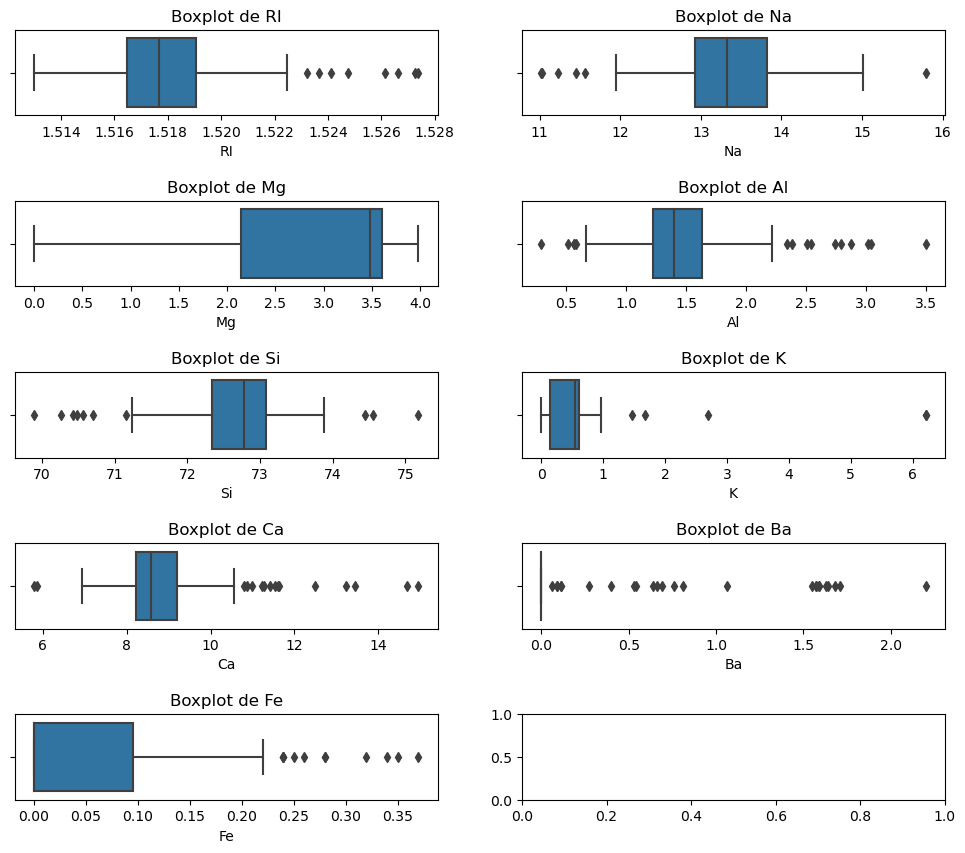

In [16]:
def plot_boxplots(data_frame):
    num_cols = 2
    num_rows = (data_frame.shape[1] + 1) // 2
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 2 * num_rows))
    fig.subplots_adjust(hspace=1)
    for i, col in enumerate(data_frame.columns):
        row = i // num_cols
        col_index = i % num_cols  
        sns.boxplot(x=data_frame[col], ax=axes[row, col_index])
        axes[row, col_index].set_title(f'Boxplot de {col}')
    plt.show()
plot_boxplots(data_feature_train_gl)

In [21]:
# Méthode de l'écart interquartile (IQR) pour identifier les outliers
def detect_outliers_iqr(data):
    outliers = pd.DataFrame()
    for col in data.columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers[col] = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col]
    return outliers

# Méthode de la médiane pour remplacer les outliers
def replace_outliers_median(data):
    for col in data.columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        median_val = data[col].median()  # Calculer la médiane de la colonne
        data[col] = data[col].apply(lambda x: median_val if (x < lower_bound or x > upper_bound) else x)
    return data

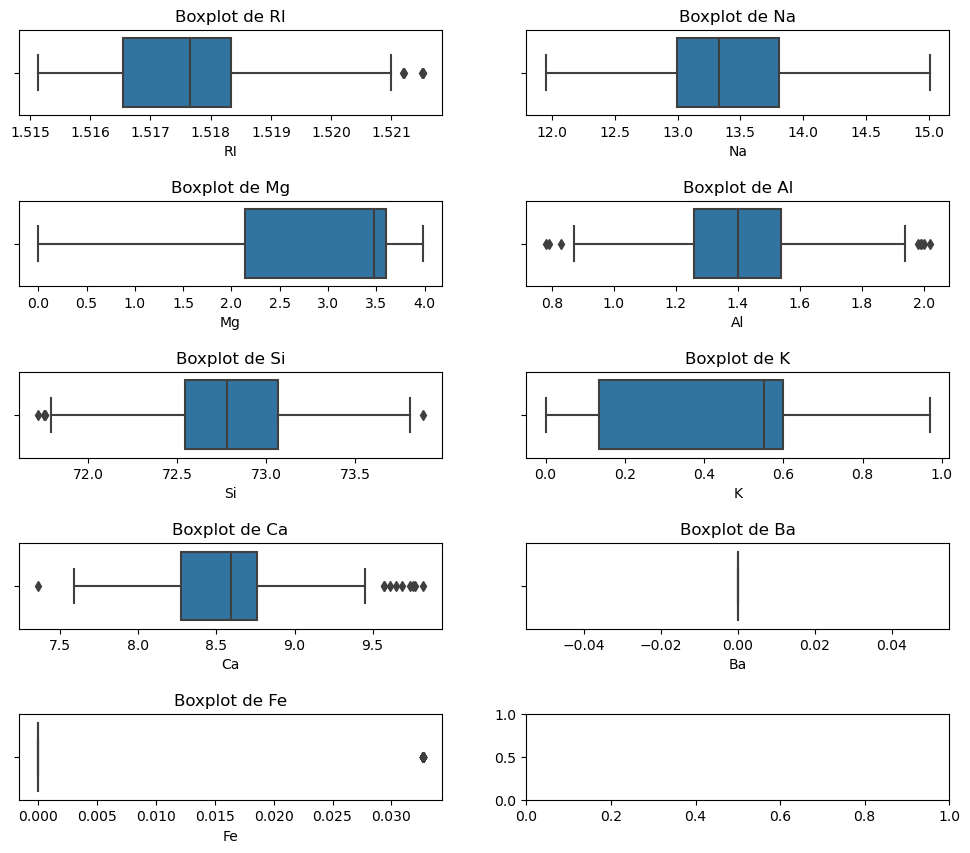

In [22]:
data_feature_train_gl=replace_outliers_median(data_feature_train_gl)
plot_boxplots(data_feature_train_gl)

In [23]:
knn_gl = KNeighborsClassifier()
knn_gl.fit(data_feature_train_gl, data_cible_train_gl)

KNeighborsClassifier()

In [24]:
prediction_knn_gl= knn_gl.predict(data_feature_test_gl)
accuracy_knn_gl = accuracy_score(data_cible_test_gl, prediction_knn_gl)
recall_knn_gl = recall_score(data_cible_test_gl, prediction_knn_gl, average='micro')
f1_knn_gl = f1_score(data_cible_test_gl, prediction_knn_gl,average='micro')

print("Accuracy :", accuracy_knn_gl*100, '%')
print("Recall :", recall_knn_gl*100, '%')
print("F1-score :", f1_knn_gl*100, '%')

Accuracy : 64.7887323943662 %
Recall : 64.7887323943662 %
F1-score : 64.7887323943662 %
